In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation 
from sklearn.model_selection import train_test_split 

# DATA

In [2]:
rawData=pd.read_csv('Credit_One.csv')
rawData.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CRLIM     2396 non-null   int64 
 1   SEX       2396 non-null   object
 2   EDU       2396 non-null   object
 3   MARRIAGE  2396 non-null   int64 
 4   AGE       2396 non-null   int64 
 5   RPS9      2396 non-null   int64 
 6   RPS8      2396 non-null   int64 
 7   RPS7      2396 non-null   int64 
 8   RPS6      2396 non-null   int64 
 9   RPS5      2396 non-null   int64 
 10  RPS4      2396 non-null   int64 
 11  BILL9     2396 non-null   int64 
 12  BILL8     2396 non-null   int64 
 13  BILL7     2396 non-null   int64 
 14  BILL6     2396 non-null   int64 
 15  BILL5     2396 non-null   int64 
 16  BILL4     2396 non-null   int64 
 17  PAY9      2396 non-null   int64 
 18  PAY8      2396 non-null   int64 
 19  PAY7      2396 non-null   int64 
 20  PAY6      2396 non-null   int64 
 21  PAY5      2396

In [4]:
Data2 = rawData
Data2.DEF.replace(('default', 'not default'), (1, 0), inplace=True)
Data2.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
Data3 = pd.get_dummies(Data2)
print(Data3)

       CRLIM  MARRIAGE  AGE  RPS9  RPS8  RPS7  RPS6  RPS5  RPS4  BILL9  ...  \
0      20000         1   24     2     2    -1    -1    -2    -2   3913  ...   
1     120000         2   26    -1     2     0     0     0     2   2682  ...   
2      90000         2   34     0     0     0     0     0     0  29239  ...   
3      50000         1   37     0     0     0     0     0     0  46990  ...   
4      50000         1   57    -1     0    -1     0     0     0   8617  ...   
...      ...       ...  ...   ...   ...   ...   ...   ...   ...    ...  ...   
2391   50000         1   32     2     3     2     2     2     2  39589  ...   
2392   20000         2   49     0     0     2     0    -1    -1   8503  ...   
2393  130000         2   24     1    -2    -1    -1    -1    -1    -10  ...   
2394  110000         1   27     0     0     0     0     0     0  61152  ...   
2395  200000         1   29     0     0     0     2     2     2  45982  ...   

      PAY6  PAY5  PAY4  DEF  SEX_female  SEX_male  

In [6]:
#define input data and target variable
X = Data3.drop(['CRLIM'], 1)
print(X)

      MARRIAGE  AGE  RPS9  RPS8  RPS7  RPS6  RPS5  RPS4  BILL9  BILL8  ...  \
0            1   24     2     2    -1    -1    -2    -2   3913   3102  ...   
1            2   26    -1     2     0     0     0     2   2682   1725  ...   
2            2   34     0     0     0     0     0     0  29239  14027  ...   
3            1   37     0     0     0     0     0     0  46990  48233  ...   
4            1   57    -1     0    -1     0     0     0   8617   5670  ...   
...        ...  ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
2391         1   32     2     3     2     2     2     2  39589  40160  ...   
2392         2   49     0     0     2     0    -1    -1   8503  11352  ...   
2393         2   24     1    -2    -1    -1    -1    -1    -10    -10  ...   
2394         1   27     0     0     0     0     0     0  61152  60833  ...   
2395         1   29     0     0     0     2     2     2  45982  46328  ...   

      PAY6  PAY5  PAY4  DEF  SEX_female  SEX_male  EDU_graduate

/var/folders/1v/xh0slf094mzf0frzndx95npm0000gn/T/ipykernel_58723/3325077476.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Data3.drop(['CRLIM'], 1)


In [7]:
#dependent variable
y = Data3['CRLIM']
print(y)

0        20000
1       120000
2        90000
3        50000
4        50000
         ...  
2391     50000
2392     20000
2393    130000
2394    110000
2395    200000
Name: CRLIM, Length: 2396, dtype: int64


# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(n_jobs=10)
model

LinearRegression(n_jobs=10)

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
print(cross_val_score(model, X, y, cv=3)) 

[0.34765498 0.34489531 0.42749085]


## Modeling

In [12]:
algosClass = []

In [13]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [14]:
algosClass.append(('Linear Regression',LinearRegression()))

In [15]:
algosClass.append(('Support Vector Regression',SVR()))

In [16]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [17]:
print(results)
print(names)

[array([0.42556495, 0.46099812, 0.43977493]), array([0.34765498, 0.34489531, 0.42749085]), array([-0.04585072, -0.03881855, -0.03397978])]
['Random Forest Regressor', 'Linear Regression', 'Support Vector Regression']


In [18]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4421126683744105
Linear Regression 0.37334704455120415
Support Vector Regression -0.0395496835037481


In [19]:
#algo = choose your algorithm()
#algo1 = 'RandomForestRegressor'
#algo2 = 'LinearRegression'
#algo3 = 'SupportVectorRegression'

In [20]:
algo2 = LinearRegression()

# Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
X_train.shape, y_train.shape

((1916, 27), (1916,))

In [23]:
X_test.shape, y_test.shape

((480, 27), (480,))

# Evaluating the Model

In [24]:
#Build training model
algo2 = LinearRegression()
algo2.fit(X_train, y_train)

LinearRegression()

In [25]:
#model = algo.fit(X_train,y_train)
modelA = algo2.fit(X_train,y_train)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [27]:
#Predictions
preds = modelA.predict(X_test)
predRsquared = r2_score(y_test,preds)
#preds
predRsquared

0.37056286859879717

In [28]:
#Adjusted r2 score
r2 = r2_score(y_test,preds)
n=len(y_test)
k=len(X_test.columns)

#Calcuate adjusted r2 score
adj_r2_score = 1-(((1-r2)*(n-1))/(n-k-1))
adj_r2_score

0.33296374791775185

In [29]:
#Mean Squared Error
mean_squared_error(y_test, preds)

10282291557.78488

In [30]:
#Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, preds))
print(rmse)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

101401.63488714016
R Squared: 0.371
RMSE: 101401.635


In [31]:
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, preds, 1)

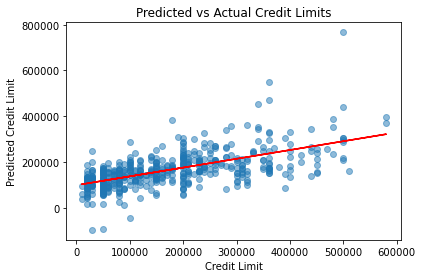

In [32]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Credit Limit')
plt.ylabel('Predicted Credit Limit')
x=y_test
plt.plot(x, m*x+b, 'r')
plt.title('Predicted vs Actual Credit Limits')
plt.show()

In [33]:
print(algo2.intercept_)

61379.96199786282


In [34]:
print(algo2.coef_)

[-1.91914546e+04  1.69005032e+03 -4.37155415e+03 -1.15858302e+04
 -9.57154439e+01 -2.17314022e+03 -8.55912246e+03 -1.22496783e+04
  3.81939847e-01 -4.04088636e-01  1.00596353e-01  3.11750398e-01
  4.70793098e-01 -1.13834623e-01  9.63787427e-01  5.30166373e-01
  1.36165339e-01  5.91085173e-01  8.00581537e-01  5.07434486e-01
  2.11618901e+03  6.82698125e+03 -6.82698125e+03  4.42706853e+04
 -2.51560131e+04 -2.21777286e+04  3.06305637e+03]


In [35]:
print(X_train.columns)

Index(['MARRIAGE', 'AGE', 'RPS9', 'RPS8', 'RPS7', 'RPS6', 'RPS5', 'RPS4',
       'BILL9', 'BILL8', 'BILL7', 'BILL6', 'BILL5', 'BILL4', 'PAY9', 'PAY8',
       'PAY7', 'PAY6', 'PAY5', 'PAY4', 'DEF', 'SEX_female', 'SEX_male',
       'EDU_graduate school', 'EDU_high school', 'EDU_other',
       'EDU_university'],
      dtype='object')


In [36]:
#Finding Outliers of prediction
for x in preds:
    if x<0:
        print(x)

-92540.70125105273
-96961.00366634116
-44200.61433215442


# Binning Columns

In [37]:
# bin AGE
bins = [20,30,40,50,60,80]
labels = ['U30','U40','U50','U60','O70']
Data3['AgeCat'] = pd.cut(Data3['AGE'],bins,labels = labels)
Data3.head(10)

,CRLIM,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,...,PAY5,PAY4,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,AgeCat
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,1,0,0,0,0,1,U30
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,1,0,0,0,0,1,U30
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,1,0,0,0,0,1,U40
3,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,0,1,0,0,0,0,1,U40
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,1,0,0,0,1,U60
5,50000,2,37,0,0,0,0,0,0,64400,...,1000,800,0,0,1,1,0,0,0,U40
6,500000,2,29,0,0,0,0,0,0,367965,...,13750,13770,0,0,1,1,0,0,0,U30
7,100000,2,23,0,-1,-1,0,0,-1,11876,...,1687,1542,0,1,0,0,0,0,1,U30
8,140000,1,28,0,0,2,0,0,0,11285,...,1000,1000,0,1,0,0,1,0,0,U30
9,20000,2,35,-2,-2,-2,-2,-1,-1,0,...,1122,0,0,0,1,0,1,0,0,U40


In [38]:
# bin LIMIT BALANCE
bins= [9999,50000,100000,200000,300000,400000,600000,1000001]
labels = ['10-50k','51-100k','101-200k','201-300k','301-400k','401-600k','601k-1M']
Data3['CL'] = pd.cut(Data3['CRLIM'],bins,labels = labels)
Data3.head(10)

,CRLIM,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,...,PAY4,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,AgeCat,CL
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,1,1,0,0,0,0,1,U30,10-50k
1,120000,2,26,-1,2,0,0,0,2,2682,...,2000,1,1,0,0,0,0,1,U30,101-200k
2,90000,2,34,0,0,0,0,0,0,29239,...,5000,0,1,0,0,0,0,1,U40,51-100k
3,50000,1,37,0,0,0,0,0,0,46990,...,1000,0,1,0,0,0,0,1,U40,10-50k
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,0,0,1,0,0,0,1,U60,10-50k
5,50000,2,37,0,0,0,0,0,0,64400,...,800,0,0,1,1,0,0,0,U40,10-50k
6,500000,2,29,0,0,0,0,0,0,367965,...,13770,0,0,1,1,0,0,0,U30,401-600k
7,100000,2,23,0,-1,-1,0,0,-1,11876,...,1542,0,1,0,0,0,0,1,U30,51-100k
8,140000,1,28,0,0,2,0,0,0,11285,...,1000,0,1,0,0,1,0,0,U30,101-200k
9,20000,2,35,-2,-2,-2,-2,-1,-1,0,...,0,0,0,1,0,1,0,0,U40,10-50k


In [39]:
#drop columns
X2 = Data3.drop(Data3.columns[[0,2]], axis=1)
X2.head()

,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,...,PAY4,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,AgeCat,CL
0,1,2,2,-1,-1,-2,-2,3913,3102,689,...,0,1,1,0,0,0,0,1,U30,10-50k
1,2,-1,2,0,0,0,2,2682,1725,2682,...,2000,1,1,0,0,0,0,1,U30,101-200k
2,2,0,0,0,0,0,0,29239,14027,13559,...,5000,0,1,0,0,0,0,1,U40,51-100k
3,1,0,0,0,0,0,0,46990,48233,49291,...,1000,0,1,0,0,0,0,1,U40,10-50k
4,1,-1,0,-1,0,0,0,8617,5670,35835,...,679,0,0,1,0,0,0,1,U60,10-50k


In [40]:
# change age category to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
age_encoded = le.fit_transform(X2['AgeCat'])
print(age_encoded)

[1 1 2 ... 1 1 1]


In [42]:
X2['age_encoded'] = age_encoded
X2.head()

,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,...,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,AgeCat,CL,age_encoded
0,1,2,2,-1,-1,-2,-2,3913,3102,689,...,1,1,0,0,0,0,1,U30,10-50k,1
1,2,-1,2,0,0,0,2,2682,1725,2682,...,1,1,0,0,0,0,1,U30,101-200k,1
2,2,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,0,0,1,U40,51-100k,2
3,1,0,0,0,0,0,0,46990,48233,49291,...,0,1,0,0,0,0,1,U40,10-50k,2
4,1,-1,0,-1,0,0,0,8617,5670,35835,...,0,0,1,0,0,0,1,U60,10-50k,4


In [43]:
CL_encoded = le.fit_transform(X2['CL'])
print(CL_encoded)

[0 1 5 ... 1 1 1]


In [44]:
X2['CL_encoded'] = CL_encoded
X2.head()

,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,...,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,AgeCat,CL,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,3913,3102,689,...,1,0,0,0,0,1,U30,10-50k,1,0
1,2,-1,2,0,0,0,2,2682,1725,2682,...,1,0,0,0,0,1,U30,101-200k,1,1
2,2,0,0,0,0,0,0,29239,14027,13559,...,1,0,0,0,0,1,U40,51-100k,2,5
3,1,0,0,0,0,0,0,46990,48233,49291,...,1,0,0,0,0,1,U40,10-50k,2,0
4,1,-1,0,-1,0,0,0,8617,5670,35835,...,0,1,0,0,0,1,U60,10-50k,4,0


In [45]:
#drop age cat and CL, Pay columns
X4 = X2.drop(['AgeCat','CL','PAY9','PAY8','PAY7','PAY6','PAY5','PAY4','BILL9','BILL8','BILL7','BILL6','BILL5','BILL4','DEF'], 1)
X4

/var/folders/1v/xh0slf094mzf0frzndx95npm0000gn/T/ipykernel_58723/444043023.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X4 = X2.drop(['AgeCat','CL','PAY9','PAY8','PAY7','PAY6','PAY5','PAY4','BILL9','BILL8','BILL7','BILL6','BILL5','BILL4','DEF'], 1)


,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,1,0,0,0,0,1,1,0
1,2,-1,2,0,0,0,2,1,0,0,0,0,1,1,1
2,2,0,0,0,0,0,0,1,0,0,0,0,1,2,5
3,1,0,0,0,0,0,0,1,0,0,0,0,1,2,0
4,1,-1,0,-1,0,0,0,0,1,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,1,2,3,2,2,2,2,0,1,0,1,0,0,2,0
2392,2,0,0,2,0,-1,-1,1,0,0,1,0,0,3,0
2393,2,1,-2,-1,-1,-1,-1,1,0,0,0,0,1,1,1
2394,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1


In [46]:
#drop age cat and CL, Pay columns, Keep DEF column
X5 = X2.drop(['AgeCat','CL','PAY9','PAY8','PAY7','PAY6','PAY5','PAY4','BILL9','BILL8','BILL7','BILL6','BILL5','BILL4'], 1)
X5

/var/folders/1v/xh0slf094mzf0frzndx95npm0000gn/T/ipykernel_58723/1721476127.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X5 = X2.drop(['AgeCat','CL','PAY9','PAY8','PAY7','PAY6','PAY5','PAY4','BILL9','BILL8','BILL7','BILL6','BILL5','BILL4'], 1)


,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,1,1,0,0,0,0,1,1,0
1,2,-1,2,0,0,0,2,1,1,0,0,0,0,1,1,1
2,2,0,0,0,0,0,0,0,1,0,0,0,0,1,2,5
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0
4,1,-1,0,-1,0,0,0,0,0,1,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,1,2,3,2,2,2,2,1,0,1,0,1,0,0,2,0
2392,2,0,0,2,0,-1,-1,0,1,0,0,1,0,0,3,0
2393,2,1,-2,-1,-1,-1,-1,0,1,0,0,0,0,1,1,1
2394,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1


# Classification 

In [47]:
#features
X3 = X4.iloc[:,0:15]
print('Summary of feature sample')
X3.head()

Summary of feature sample


,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,1,0,0,0,0,1,1,0
1,2,-1,2,0,0,0,2,1,0,0,0,0,1,1,1
2,2,0,0,0,0,0,0,1,0,0,0,0,1,2,5
3,1,0,0,0,0,0,0,1,0,0,0,0,1,2,0
4,1,-1,0,-1,0,0,0,0,1,0,0,0,1,4,0


In [48]:
#Credit Limit as Dependent variable, y
y3=X2['DEF']
print(y3)

0       1
1       1
2       0
3       0
4       0
       ..
2391    1
2392    0
2393    0
2394    0
2395    0
Name: DEF, Length: 2396, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [50]:
#Train/Test Split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=.30, random_state =123)

In [51]:
#Modeling- Classification
algo3 = DecisionTreeClassifier()
model3= algo3.fit(X3_train,y3_train)

In [52]:
#Predictions
preds3 = model3.predict(X3_test)
print(classification_report(y3_test, preds3))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       572
           1       0.43      0.34      0.38       147

    accuracy                           0.77       719
   macro avg       0.63      0.61      0.62       719
weighted avg       0.75      0.77      0.76       719



In [53]:
score=algo3.score(X3_test, y3_test)
print('Accuracy Score for Non-Default/Default Status =',"%.1f%%" % (100 * score))

Accuracy Score for Non-Default/Default Status = 77.2%


In [54]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n{}'.format(confusion_matrix(y3_test, preds3)))

Confusion Matrix: 
[[505  67]
 [ 97  50]]


# Classfication of U30&U40 Age Category Data

In [55]:
U40Data = X5[X5['age_encoded'] < 3]
U40Data

,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,DEF,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,1,1,0,0,0,0,1,1,0
1,2,-1,2,0,0,0,2,1,1,0,0,0,0,1,1,1
2,2,0,0,0,0,0,0,0,1,0,0,0,0,1,2,5
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0
5,2,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2,1,-1,-1,-1,0,0,0,0,1,1,0,0,0,2,4
2391,1,2,3,2,2,2,2,1,0,1,0,1,0,0,2,0
2393,2,1,-2,-1,-1,-1,-1,0,1,0,0,0,0,1,1,1
2394,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1


In [56]:
#features
X6 = U40Data.drop(['DEF'], 1)
print('Summary of feature sample')
X6.head()

Summary of feature sample


/var/folders/1v/xh0slf094mzf0frzndx95npm0000gn/T/ipykernel_58723/2626589294.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X6 = U40Data.drop(['DEF'], 1)


,MARRIAGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,SEX_female,SEX_male,EDU_graduate school,EDU_high school,EDU_other,EDU_university,age_encoded,CL_encoded
0,1,2,2,-1,-1,-2,-2,1,0,0,0,0,1,1,0
1,2,-1,2,0,0,0,2,1,0,0,0,0,1,1,1
2,2,0,0,0,0,0,0,1,0,0,0,0,1,2,5
3,1,0,0,0,0,0,0,1,0,0,0,0,1,2,0
5,2,0,0,0,0,0,0,0,1,1,0,0,0,2,0


In [57]:
#Credit Limit as Dependent variable, y
y6=U40Data['DEF']
print(y6)

0       1
1       1
2       0
3       0
5       0
       ..
2390    0
2391    1
2393    0
2394    0
2395    0
Name: DEF, Length: 1773, dtype: int64


In [58]:
#Train/Test Split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=.30, random_state =123)

In [59]:
#Modeling- Classification
algo6 = DecisionTreeClassifier()
model6= algo6.fit(X6_train,y6_train)

In [60]:
#Predictions
preds6 = model6.predict(X6_test)
print(classification_report(y6_test, preds6))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       429
           1       0.35      0.36      0.35       103

    accuracy                           0.74       532
   macro avg       0.60      0.60      0.60       532
weighted avg       0.75      0.74      0.75       532



In [61]:
score=algo6.score(X6_test, y6_test)
print('Accuracy Score for Non-Default/Default Status =',"%.1f%%" % (100 * score))

Accuracy Score for Non-Default/Default Status = 74.4%


In [62]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n{}'.format(confusion_matrix(y6_test, preds6)))

Confusion Matrix: 
[[359  70]
 [ 66  37]]
